#### Read and Convert TalTech Sensor Data

In [55]:
from mmap import mmap, ACCESS_READ
from struct import unpack
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
test_file_path = "../../data/raw_data/flight/exp1/taltech/shoes/sw5_B021105121250.HIG"
#test_file_path = "../../data/raw_data/flight/exp1/taltech/barefoot/bw17_B021105115947.HIG"
#test_file_path = "../../data/raw_data/flight/exp1/taltech/barefoot/bw16_B021105115649.HIG"
#test_file_path = "../../data/raw_data/flight/exp1/taltech/shoes/sw3_B021105115346.HIG"
#test_file_path = "../../data/raw_data/flight/exp1/taltech/shoes/sr7_B021105121850.HIG"
frame_length = 11
conversion = 0.000488

data_df = pd.DataFrame(columns=['X', 'Y', 'Z', 'mag'])

In [77]:
def unpacking_v2_format_hig(row, conversion):
    #print(row)
    list_values = []
    index = (unpack('>I', bytes(row[0:4]))[0]) 
    acc_x = (unpack('>h', bytes(row[4:6]))[0]) * conversion
    acc_y = (unpack('>h', bytes(row[6:8]))[0])  * conversion
    acc_z = (unpack('>h', bytes(row[8:10]))[0])  * conversion

    #index = (index / 6000)
    #list_values.append(index)
    acc_x = float(acc_x) 
    list_values.append(acc_x)
    acc_y = acc_y 
    list_values.append(acc_y)
    acc_z = acc_z 
    list_values.append(acc_z)
    amag = round(sqrt(pow(acc_x, 2) + pow(acc_y, 2) + pow(acc_z, 2)),2)
    list_values.append(amag)

    
    
    return list_values

def read_row(mm, frame_length, hig=1,):
    count = 0
    while True:
        count += 1
        if(hig==1):
            row = mm.read(frame_length) # packet length
            if not len(row) == frame_length: 
                break 
        yield row 



In [78]:
# read a file

all_file_results = []
with open(test_file_path,'rb') as file:
    mm = mmap(file.fileno(), 0, access=ACCESS_READ)
    results = [unpacking_v2_format_hig(row, conversion) for row in read_row(mm, frame_length)]
    all_file_results.append(results)
    mm.close()
    file.close()

# need to create a data frame
df = pd.DataFrame(all_file_results[0], columns=['X', 'Y', 'Z', 'mag'])

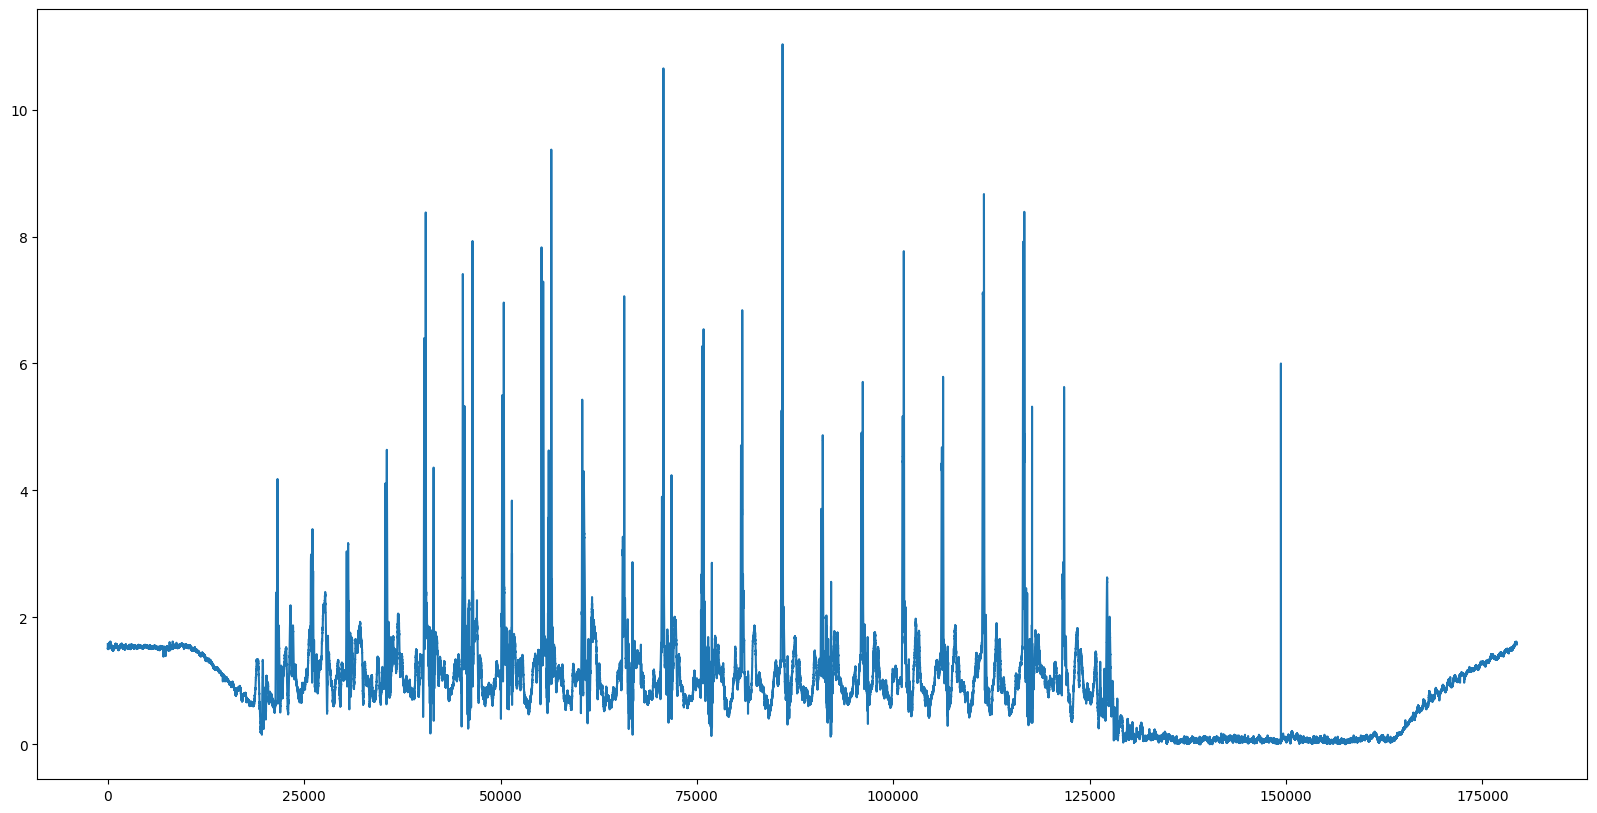

In [79]:
# plot the mag
# simple graphs
fig, ax = plt.subplots(1,1, figsize=(20, 10))

ax.plot(df["mag"])